## Semester 1 Project Submission

Please fill out:
* Student name: EJ Donelson
* Instructor name: Abhineet


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head()

FileNotFoundError: [Errno 2] No such file or directory: 'zippedData/bom.movie_gross.csv.gz'

In [ ]:
rt_movie = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie.head()

In [ ]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews.head()

In [ ]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb.head()

In [6]:
tn_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:
pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
pd.read_sql("""
SELECT *
FROM directors
;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [10]:
pd.read_sql("""
SELECT *
FROM known_for
;""", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [11]:
pd.read_sql("""
SELECT *
FROM movie_akas
;""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [12]:
pd.read_sql("""
SELECT *
FROM movie_ratings
;""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
pd.read_sql("""
SELECT *
FROM persons
;""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [14]:
pd.read_sql("""
SELECT *
FROM principals
;""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [15]:
pd.read_sql("""
SELECT *
FROM writers
;""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [16]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [17]:
bom['foreign_gross']= bom['foreign_gross'].str.replace(',','')

In [18]:
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

In [19]:
bom = bom.astype({'foreign_gross': float})

In [20]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [21]:
bom['domestic_gross'] = bom['domestic_gross'].fillna(0)

In [22]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [23]:
bom = bom[bom['studio'].notna()]

In [24]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [25]:
bom.describe()

,domestic_gross,foreign_gross,year
count,3.382000e+03,3.382000e+03,3382.000000
mean,2.855030e+07,4.505716e+07,2013.959787
std,6.679610e+07,1.127504e+08,2.477735
min,0.000000e+00,0.000000e+00,2010.000000
25%,1.120000e+05,0.000000e+00,2012.000000
50%,1.300000e+06,1.450000e+06,2014.000000
75%,2.767500e+07,2.917500e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [26]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [ ]:
###drop currency and box office and studio columns??

In [27]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [28]:
rt_reviews = rt_reviews[rt_reviews['rating'].notna()]

In [29]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40915 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          40915 non-null  int64 
 1   review      35379 non-null  object
 2   rating      40915 non-null  object
 3   fresh       40915 non-null  object
 4   critic      38935 non-null  object
 5   top_critic  40915 non-null  int64 
 6   publisher   40688 non-null  object
 7   date        40915 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


In [30]:
rt_reviews = rt_reviews[rt_reviews['review'].notna()]

In [31]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          35379 non-null  int64 
 1   review      35379 non-null  object
 2   rating      35379 non-null  object
 3   fresh       35379 non-null  object
 4   critic      34189 non-null  object
 5   top_critic  35379 non-null  int64 
 6   publisher   35152 non-null  object
 7   date        35379 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [36]:
rt_reviews = rt_reviews[rt_reviews['critic'].notna()]

In [39]:
rt_reviews = rt_reviews[rt_reviews['publisher'].notna()]

In [40]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [41]:
rt_reviews['rating'].value_counts()

3/4       3267
3/5       2971
4/5       2800
2/4       2442
2.5/4     2156
          ... 
4.0          1
3.1          1
9.0          1
0.5/10       1
4.9          1
Name: rating, Length: 182, dtype: int64

In [ ]:
### clean rating column. ratings are out of 4, 5, 10, etc. Some have decimals, some shows /'s
### need to standardize ratings and turn to integers/floats

In [43]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [44]:
tmdb['popularity'].value_counts() ### what is this??

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

In [45]:
tmdb['original_language'].value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
cr        1
xh        1
af        1
nb        1
ky        1
Name: original_language, Length: 76, dtype: int64

In [46]:
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'])

In [49]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [50]:
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])

In [53]:
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$','')
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',','')

In [66]:
tn_budgets = tn_budgets.astype({'production_budget': 'int64'})

In [57]:
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$','')
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',','')

In [67]:
tn_budgets = tn_budgets.astype({'domestic_gross': 'int64'})

In [59]:
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$','')
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',','')

In [68]:
tn_budgets = tn_budgets.astype({'worldwide_gross': 'int64'})

In [69]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [81]:
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,-2147483648
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


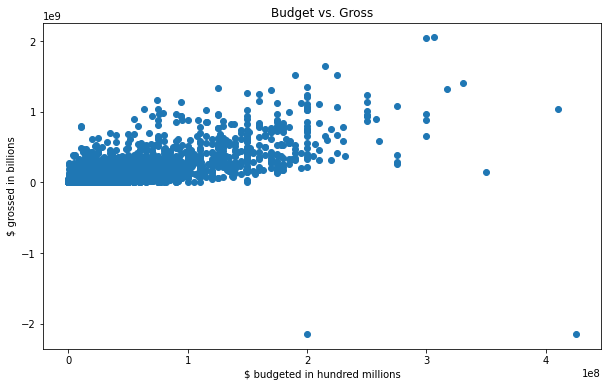

In [83]:
x = tn_budgets['production_budget']
y =tn_budgets['worldwide_gross']
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('$ budgeted in hundred millions')
plt.ylabel('$ grossed in billions')
plt.title('Budget vs. Gross');